<a href="https://colab.research.google.com/github/leannmlindsey/gLM_tokenization/blob/main/TokenizationFINALFigures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries


In [568]:
import matplotlib.pyplot as plt
import pandas as pd
!pip install matplotlib-venn
from matplotlib_venn import venn2, venn3
import numpy as np

# Accuracy Trends by Category


In [569]:
#df = pd.read_csv('benchmark_raw.csv')
#df = pd.read_csv('benchmark_results_raw.csv')
#df = pd.read_csv('benchmark_acc_raw.csv')
df = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_acc_raw.csv')

df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df['GPT-2'].fillna(value=0, inplace=True)

In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Benchmark      51 non-null     object 
 1   Category       51 non-null     object 
 2   Dataset        51 non-null     object 
 3   CNN            51 non-null     float64
 4   GPT-2          51 non-null     float64
 5   NT-kmer        51 non-null     float64
 6   DNABERT1-kmer  51 non-null     float64
 7   DNABERT2-bpe   51 non-null     float64
 8   HyenaDNA-char  51 non-null     float64
 9   Mamba-char     51 non-null     float64
 10  Mamba-bpe      51 non-null     float64
 11  Caduceus-char  51 non-null     float64
dtypes: float64(9), object(3)
memory usage: 4.9+ KB


In [571]:
df.head()

,Benchmark,Category,Dataset,CNN,GPT-2,NT-kmer,DNABERT1-kmer,DNABERT2-bpe,HyenaDNA-char,Mamba-char,Mamba-bpe,Caduceus-char
0,Genomic Benchmark,coding,demo_coding_vs_intergenomic_seqs,0.892,0.771,0.909,0.866,0.896,0.899,0.913,0.886,0.914
1,Genomic Benchmark,enhancers,dummy_mouse_enhancers_ensembl,0.715,0.649,0.676,0.621,0.654,0.641,0.768,0.758,0.802
2,Genomic Benchmark,enhancers,human_enhancers_cohn,0.705,0.609,0.714,0.652,0.650,0.671,0.736,0.730,0.747
3,Genomic Benchmark,enhancers,human_enhancers_ensembl,0.767,0.676,0.855,0.804,0.831,0.893,0.864,0.864,0.889
4,Genomic Benchmark,promoters,human_nontata_promoters,0.860,0.706,0.863,0.780,0.818,0.914,0.920,0.914,0.947


In [572]:
df_long_acc = pd.melt(df, id_vars=['Benchmark','Dataset', 'Category'], var_name='Model', value_name='Score')

In [573]:
df_long_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Benchmark  459 non-null    object 
 1   Dataset    459 non-null    object 
 2   Category   459 non-null    object 
 3   Model      459 non-null    object 
 4   Score      459 non-null    float64
dtypes: float64(1), object(4)
memory usage: 18.1+ KB


In [574]:
df_long_acc['Score'] = pd.to_numeric(df_long_acc['Score'], errors='coerce')
df_long_acc['Score'].fillna(value=0, inplace=True)
df_long_acc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Benchmark  459 non-null    object 
 1   Dataset    459 non-null    object 
 2   Category   459 non-null    object 
 3   Model      459 non-null    object 
 4   Score      459 non-null    float64
dtypes: float64(1), object(4)
memory usage: 18.1+ KB


In [575]:
df_filtered_acc = df_long_acc[df_long_acc['Category'].isin(['promoters', 'enhancers', 'regulatory'])]

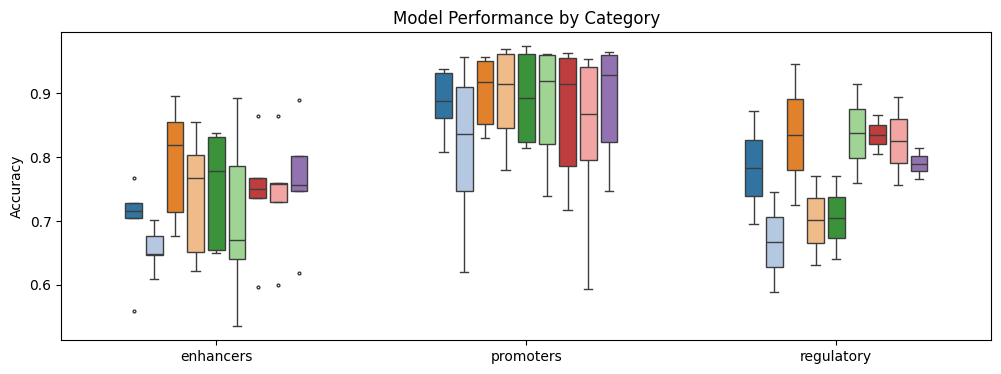

In [576]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(12, 4))
sns.boxplot(x='Category', y='Score', hue='Model', palette='tab20', data=df_filtered_acc, width=0.6, fliersize=2, gap=.2)

plt.title('Model Performance by Category')
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend().remove()

plt.savefig('box_plot_comparison_regulatory.jpg', format='jpg')
plt.show()


In [577]:
df_filtered_acc = df_long_acc[df_long_acc['Category'].isin(['emp', 'transcription factors', 'splice sites'])]

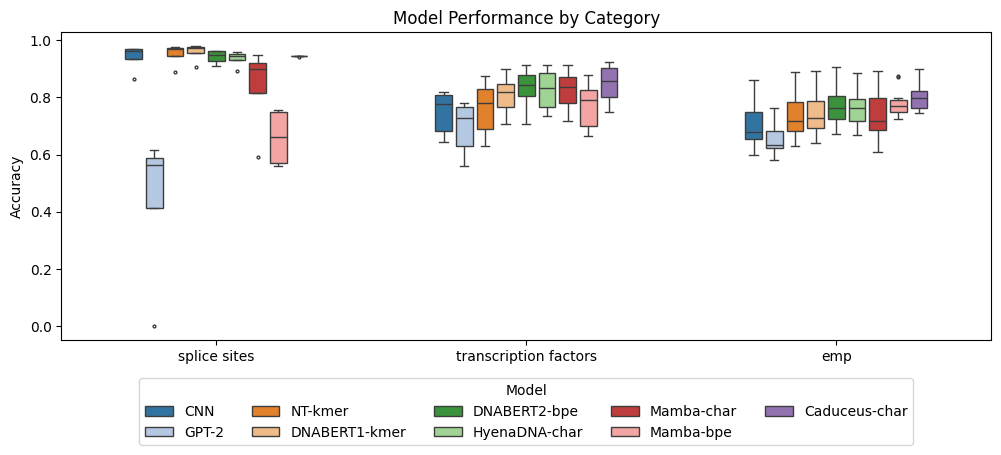

In [578]:
# Create the box plot
plt.figure(figsize=(12, 4))
sns.boxplot(x='Category', y='Score', hue='Model', palette='tab20', data=df_filtered_acc, width=0.6, fliersize=2, gap=.2)

# Adjust the legend to avoid duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:10], labels[0:10], title='Model', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)

plt.title('Model Performance by Category')
plt.ylabel('Accuracy')
plt.xlabel('')
plt.savefig('box_plot_comparison_transcription.jpg', format='jpg')
plt.show()

<Figure size 1200x800 with 0 Axes>

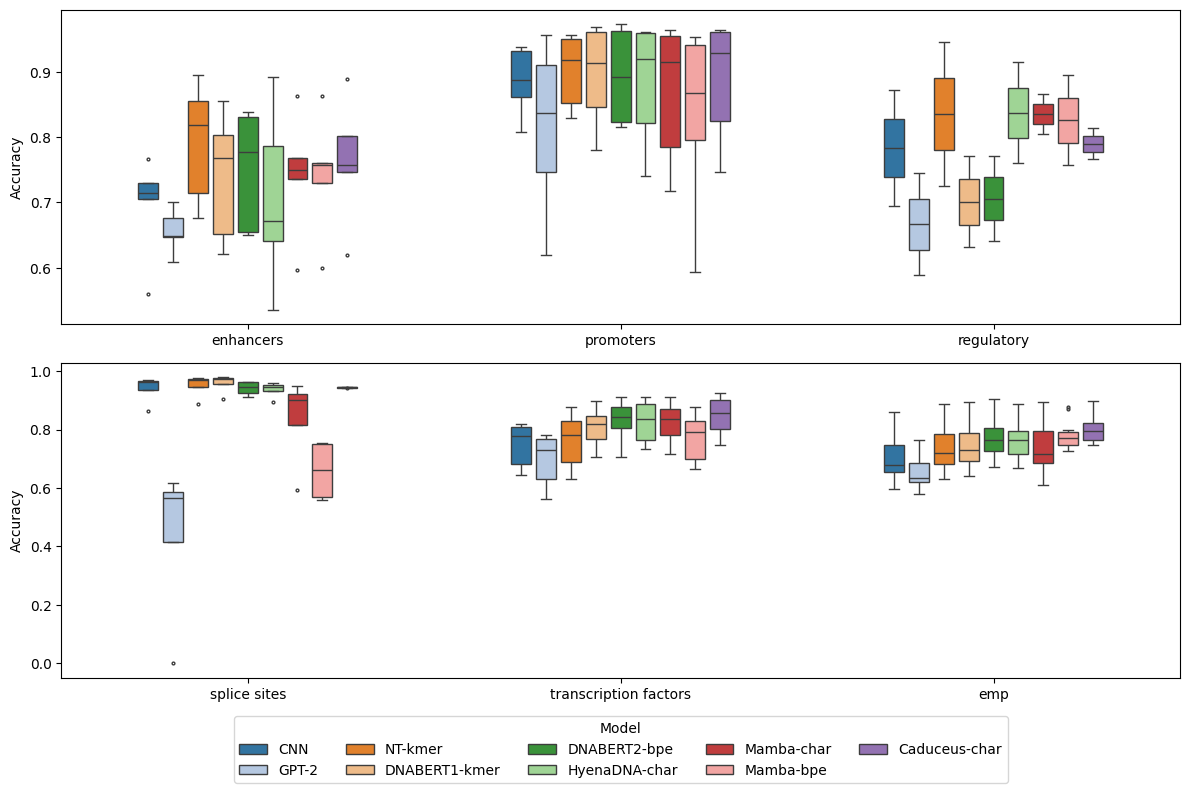

In [579]:
plt.figure(figsize=(12, 8))
# Plot 1
df_filtered_acc = df_long_acc[df_long_acc['Category'].isin(['promoters', 'enhancers', 'regulatory'])]
plt.figure(figsize=(12, 8))  # Adjust figsize to accommodate both subplots
plt.subplot(2, 1, 1)  # Subplot 1 (rows, columns, index)
sns.boxplot(x='Category', y='Score', hue='Model', palette='tab20', data=df_filtered_acc, width=0.6, fliersize=2, gap=.2)
#plt.title('Model Performance by Category')
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend().remove()  # Remove legend for the first plot


# Plot 2
df_filtered_acc = df_long_acc[df_long_acc['Category'].isin(['emp', 'transcription factors', 'splice sites'])]
plt.subplot(2, 1, 2)  # Subplot 2 (rows, columns, index)
sns.boxplot(x='Category', y='Score', hue='Model', palette='tab20', data=df_filtered_acc, width=0.6, fliersize=2, gap=.2)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:10], labels[0:10], title='Model', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)
#plt.title('Model Performance by Category')
plt.ylabel('Accuracy')
plt.xlabel('')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save both plots with shared legend
plt.savefig('box_plots_combined_acc.jpg', format='jpg')

plt.show()

# MCC Trends by Category

In [580]:
#df = pd.read_csv('benchmark_mcc_raw.csv')
df = pd.read_csv("https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_mcc_raw.csv")
df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df['GPT-2'].fillna(value=0, inplace=True)

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Benchmark      52 non-null     object 
 1   Abb            52 non-null     object 
 2   Category       52 non-null     object 
 3   Dataset        52 non-null     object 
 4   label          52 non-null     object 
 5   CNN            52 non-null     float64
 6   GPT-2          52 non-null     float64
 7   NT-kmer        52 non-null     float64
 8   DNABERT1-kmer  52 non-null     float64
 9   DNABERT2-bpe   52 non-null     float64
 10  HyenaDNA-char  52 non-null     float64
 11  Mamba-char     52 non-null     float64
 12  Mamba-bpe      52 non-null     float64
 13  Caduceus-char  52 non-null     float64
dtypes: float64(9), object(5)
memory usage: 5.8+ KB


In [582]:
df.head()

,Benchmark,Abb,Category,Dataset,label,CNN,GPT-2,NT-kmer,DNABERT1-kmer,DNABERT2-bpe,HyenaDNA-char,Mamba-char,Mamba-bpe,Caduceus-char
0,Genomic Benchmark,GB,enhancers,dummy_mouse_enhancers_ensembl,GB-dummy_mouse_enhancers_ensembl,0.715,0.391,0.369,0.347,0.347,0.641,0.768,0.758,0.781
1,Genomic Benchmark,GB,coding,demo_coding_vs_intergenomic_seqs,GB-demo_coding_vs_intergenomic_seqs,0.892,0.541,0.818,0.732,0.792,0.899,0.913,0.886,0.827
2,Genomic Benchmark,GB,species,demo_human_or_worm,GB-demo_human_or_worm,0.942,0.595,0.891,0.816,0.853,0.958,0.968,0.957,0.963
3,Genomic Benchmark,GB,enhancers,human_enhancers_cohn,GB-human_enhancers_cohn,0.705,0.220,0.430,0.305,0.306,0.671,0.736,0.730,0.743
4,Genomic Benchmark,GB,enhancers,human_enhancers_ensembl,GB-human_enhancers_ensembl,0.767,0.499,0.710,0.609,0.662,0.893,0.864,0.864,0.892


In [583]:
df_long_mcc = pd.melt(df, id_vars=['Benchmark','Dataset', 'Category'], var_name='Model', value_name='Score')

In [584]:
df_long_mcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Benchmark  572 non-null    object
 1   Dataset    572 non-null    object
 2   Category   572 non-null    object
 3   Model      572 non-null    object
 4   Score      572 non-null    object
dtypes: object(5)
memory usage: 22.5+ KB


In [585]:
df_long_mcc.head()

,Benchmark,Dataset,Category,Model,Score
0,Genomic Benchmark,dummy_mouse_enhancers_ensembl,enhancers,Abb,GB
1,Genomic Benchmark,demo_coding_vs_intergenomic_seqs,coding,Abb,GB
2,Genomic Benchmark,demo_human_or_worm,species,Abb,GB
3,Genomic Benchmark,human_enhancers_cohn,enhancers,Abb,GB
4,Genomic Benchmark,human_enhancers_ensembl,enhancers,Abb,GB


In [586]:
df_long_mcc['Score'] = pd.to_numeric(df_long_mcc['Score'], errors='coerce')
df_long_mcc['Score'].fillna(value=0, inplace=True)
df_long_mcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Benchmark  572 non-null    object 
 1   Dataset    572 non-null    object 
 2   Category   572 non-null    object 
 3   Model      572 non-null    object 
 4   Score      572 non-null    float64
dtypes: float64(1), object(4)
memory usage: 22.5+ KB


<Figure size 1200x800 with 0 Axes>

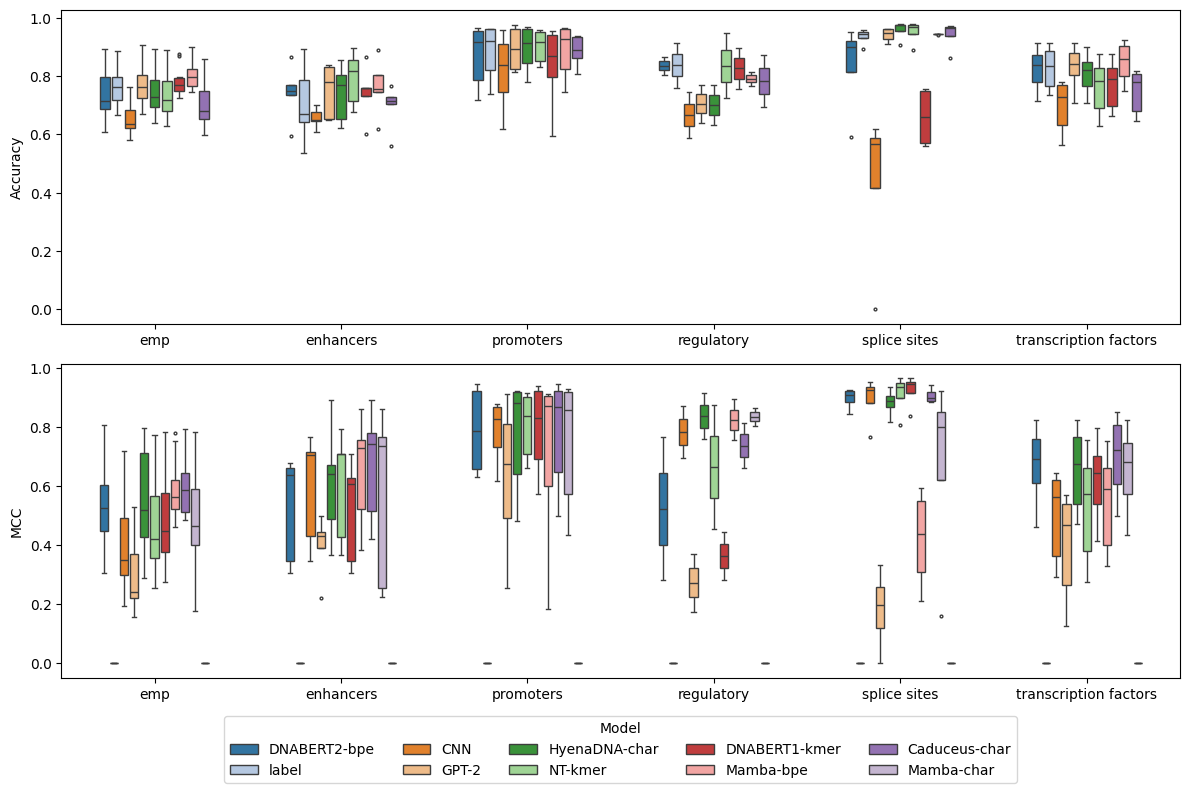

In [587]:
plt.figure(figsize=(12, 8))
category_order = ['promoters', 'enhancers', 'regulatory', 'emp', 'transcription factors', 'splice sites']
# Plot 1
df_long_acc = df_long_acc.sort_values(by='Category')
df_filtered_acc = df_long_acc[df_long_acc['Category'].isin(category_order)]
plt.figure(figsize=(12, 8))  # Adjust figsize to accommodate both subplots
plt.subplot(2, 1, 1)  # Subplot 1 (rows, columns, index)
sns.boxplot(x='Category', y='Score', hue='Model', palette='tab20', data=df_filtered_acc, width=0.6, fliersize=2, gap=.2)
#plt.title('Model Performance by Category')
plt.ylabel('Accuracy')
plt.xlabel('')
plt.legend().remove()  # Remove legend for the first plot


# Plot 2
df_long_mcc = df_long_mcc.sort_values(by='Category')
df_filtered_mcc = df_long_mcc[df_long_mcc['Category'].isin(category_order)]
plt.subplot(2, 1, 2)  # Subplot 2 (rows, columns, index)
sns.boxplot(x='Category', y='Score', hue='Model', palette='tab20', data=df_filtered_mcc, width=0.6, fliersize=2, gap=.2)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:10], labels[0:10], title='Model', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)
#plt.title('Model Performance by Category')
plt.ylabel('MCC')
plt.xlabel('')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save both plots with shared legend
plt.savefig('box_plots_combined_mcc_acc.eps', format='eps')

plt.show()

# Heatmap MCC

In [593]:
#df = pd.read_csv('benchmark_mcc_raw.csv')
df = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_mcc_raw.csv')
df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df['GPT-2'].fillna(value=0, inplace=True)
#df = pd.read_csv('benchmark_acc_raw.csv')
df_numeric = df[df['Benchmark'].isin(['Genomic Benchmark', 'Nucleotide Transformer Tasks'])]
#df_numeric = df[df['Benchmark'].isin(['Nucleotide Transformer Tasks'])]
#df_numeric

In [594]:
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark','Abb','label'])
#df_numeric

In [595]:
datasets = df_numeric['Dataset'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']
df_numeric = df_numeric.drop(columns=['Dataset']).to_numpy()
df_numeric = df_numeric.transpose()

In [596]:
def heatmap(df_numeric, title, filename, width, height):
  fig, ax = plt.subplots(figsize=(width, height))
  im = ax.imshow(df_numeric)
  im = ax.imshow(df_numeric, cmap='RdPu',vmin=0)

  # Add colorbar
  cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
  cbar.set_label('MCC', fontsize=12)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(datasets)), labels=datasets)
  ax.set_yticks(np.arange(len(models)), labels=models, fontsize=12)
  ax.xaxis.set_ticks_position('top')  # Move x-axis ticks and labels to the top
  ax.xaxis.set_label_position('top')  # Move x-axis label to the top

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor", fontsize=12)

  # Loop over data dimensions and create text annotations.
  #for i in range(len(models)):
  #  for j in range(len(datasets)):
  #      text = ax.text(j, i, df_numeric[i, j],
  #                     ha="center", va="center", color="w", fontsize=12)
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  ax.set_title(title, fontsize=14)
  fig.tight_layout()
  #plt.savefig(filename, format='eps',bbox_inches='tight')
  plt.savefig(filename, format='pdf',bbox_inches='tight')
  plt.show()

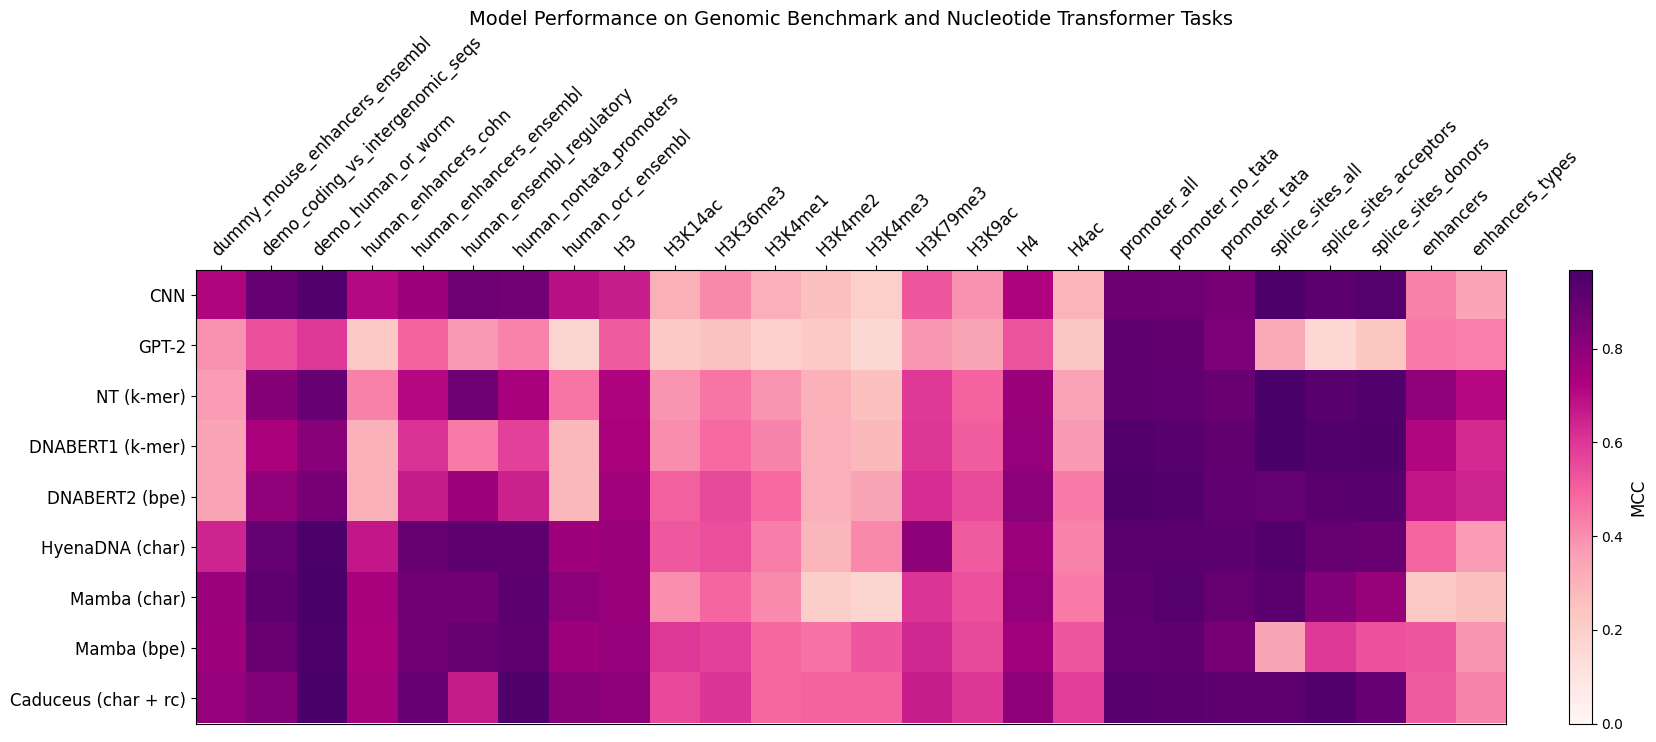

In [597]:
heatmap(df_numeric, 'Model Performance on Genomic Benchmark and Nucleotide Transformer Tasks', 'model_mcc_heatmap_gb_nt.pdf', 18, 7)

In [600]:
df_numeric = df[df['Benchmark'].isin(['GUE'])]
#df_numeric

In [601]:
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark','Abb','label'])
#df_numeric

In [602]:
datasets = df_numeric['Dataset'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']
df_numeric = df_numeric.drop(columns=['Dataset']).to_numpy()
df_numeric = df_numeric.transpose()

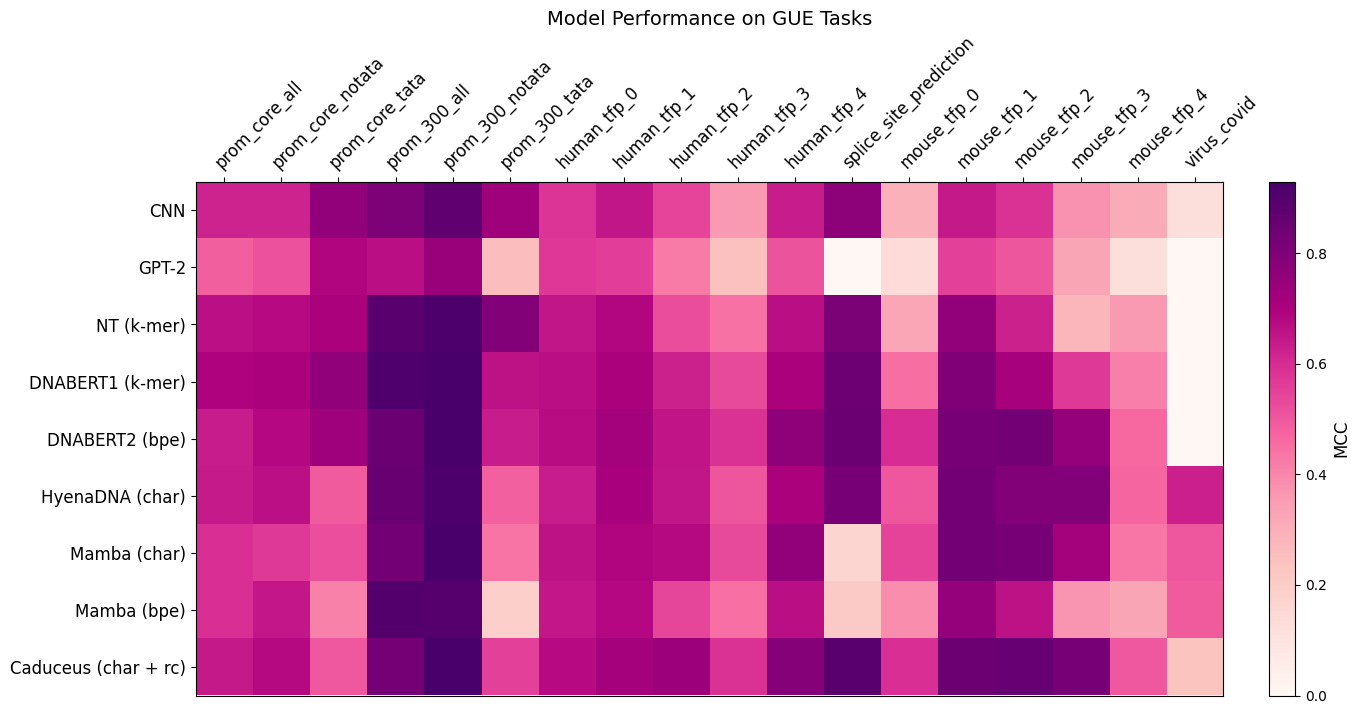

In [603]:
heatmap(df_numeric, 'Model Performance on GUE Tasks', 'model_mcc_heatmap_GUE.pdf', 14,7)

# Heatmap Accuracy

In [604]:
df = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_acc_raw.csv')
df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df['GPT-2'].fillna(value=0, inplace=True)
#df = pd.read_csv('benchmark_acc_raw.csv')
df_numeric = df[df['Benchmark'].isin(['Genomic Benchmark', 'Nucleotide Transformer Tasks'])]
#df_numeric = df[df['Benchmark'].isin(['Nucleotide Transformer Tasks'])]
#df_numeric

In [605]:
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark'])

In [606]:
datasets = df_numeric['Dataset'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']
df_numeric = df_numeric.drop(columns=['Dataset']).to_numpy()
df_numeric = df_numeric.transpose()

In [607]:
def heatmap_acc(df_numeric, title, filename, width, height):
  fig, ax = plt.subplots(figsize=(width, height))
  im = ax.imshow(df_numeric)
  im = ax.imshow(df_numeric, cmap='RdPu',vmin=0.5)

  # Add colorbar
  cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
  cbar.set_label('ACC', fontsize=12)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(datasets)), labels=datasets)
  ax.set_yticks(np.arange(len(models)), labels=models, fontsize=12)
  ax.xaxis.set_ticks_position('top')  # Move x-axis ticks and labels to the top
  ax.xaxis.set_label_position('top')  # Move x-axis label to the top

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor", fontsize=12)

  # Loop over data dimensions and create text annotations.
  #for i in range(len(models)):
  #  for j in range(len(datasets)):
  #      text = ax.text(j, i, df_numeric[i, j],
  #                     ha="center", va="center", color="w", fontsize=12)
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  ax.set_title(title, fontsize=14)
  fig.tight_layout()
  #plt.savefig(filename, format='eps',bbox_inches='tight')
  plt.savefig(filename, format='pdf',bbox_inches='tight')
  plt.show()

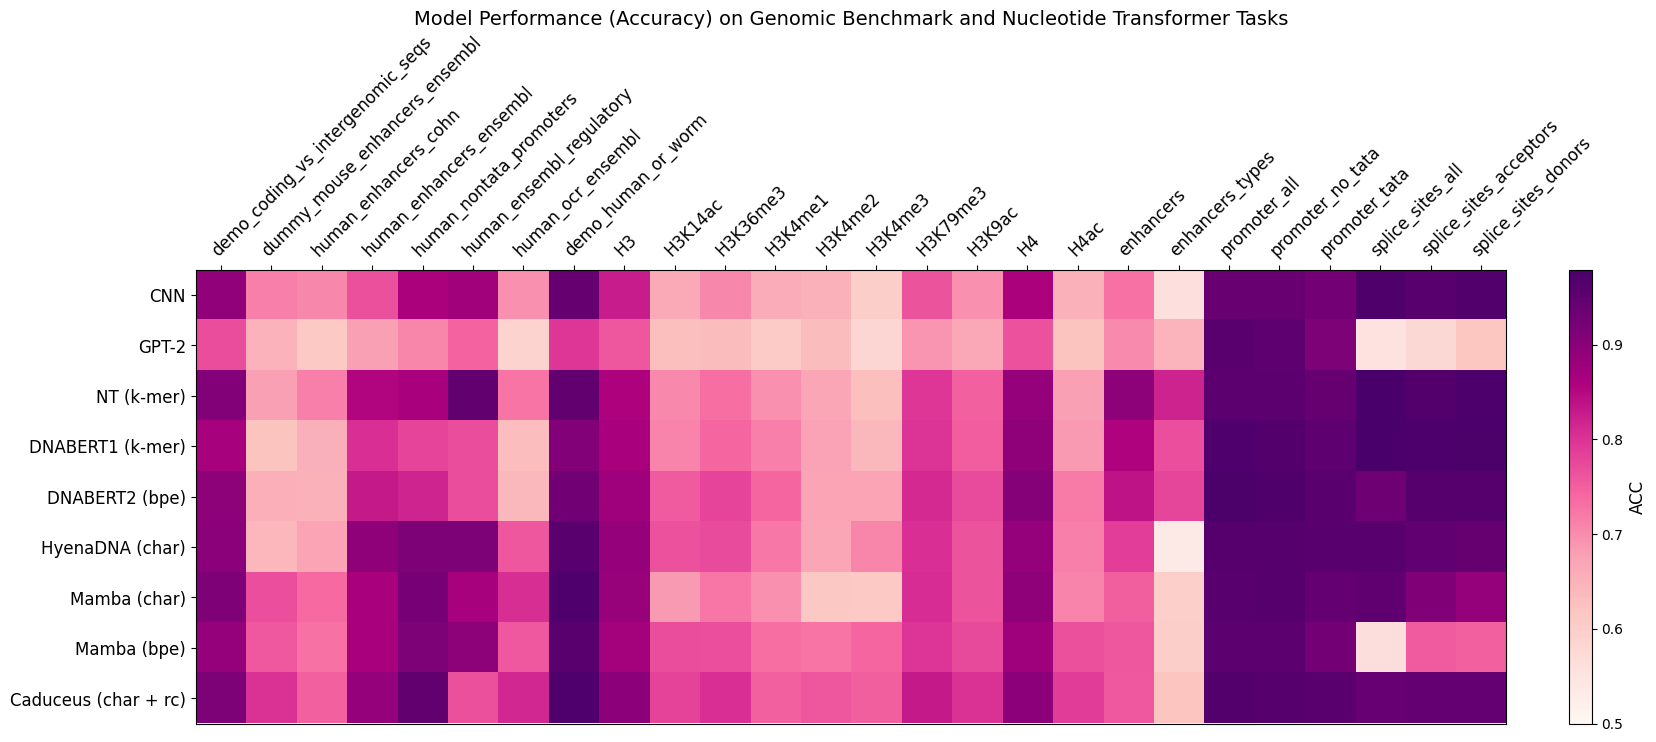

In [608]:
heatmap_acc(df_numeric, 'Model Performance (Accuracy) on Genomic Benchmark and Nucleotide Transformer Tasks', 'model_acc_heatmap_gb_nt.pdf', 18, 7)

In [609]:
df_numeric = df[df['Benchmark'].isin(['GUE'])]
#df_numeric

In [610]:
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark'])
#df_numeric

In [611]:
datasets = df_numeric['Dataset'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']
df_numeric = df_numeric.drop(columns=['Dataset']).to_numpy()
df_numeric = df_numeric.transpose()

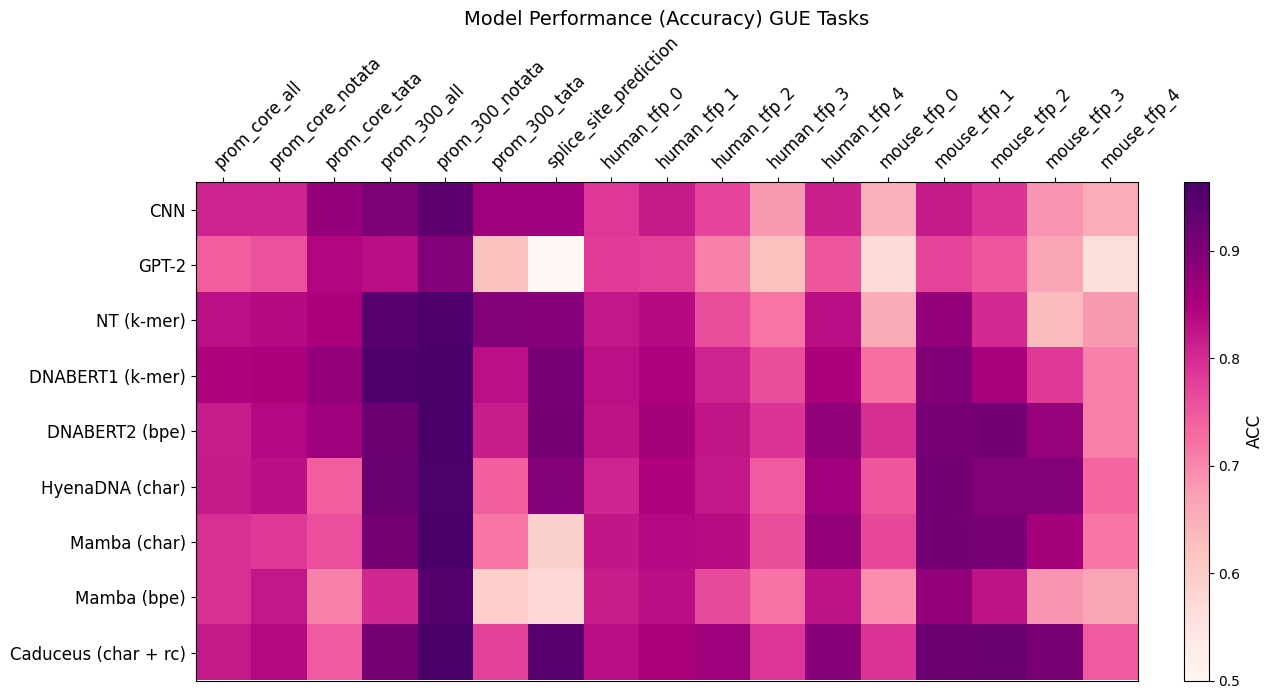

In [612]:
heatmap_acc(df_numeric, 'Model Performance (Accuracy) GUE Tasks', 'model_acc_heatmap_GUE.pdf', 14,7)

# Heatmap Vertical

In [623]:
df = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/benchmark_mcc_raw.csv')
df['GPT-2'] = pd.to_numeric(df['GPT-2'], errors='coerce')
df['GPT-2'].fillna(value=0, inplace=True)
#df = pd.read_csv('benchmark_acc_raw.csv')
df_numeric = df[df['Benchmark'].isin(['Genomic Benchmark', 'Nucleotide Transformer Tasks', 'GUE'])]
#df_numeric = df[df['Benchmark'].isin(['Nucleotide Transformer Tasks'])]
#df_numeric

In [624]:
df_numeric = df_numeric.sort_values(by='Category')
df_numeric = df_numeric.drop(columns=['Category', 'Benchmark','Dataset','Abb'])

#df_numeric

In [625]:
datasets = df_numeric['label'].tolist()
models = ['CNN',	'GPT-2',	'NT (k-mer)',	'DNABERT1 (k-mer)',	'DNABERT2 (bpe)',	'HyenaDNA (char)',	'Mamba (char)',	'Mamba (bpe)', 'Caduceus (char + rc)']
df_numeric = df_numeric.drop(columns=['label']).to_numpy()
#df_numeric = df_numeric.transpose()

In [626]:
def heatmap_mcc_vertical(df_numeric, title, filename, width, height):
  fig, ax = plt.subplots(figsize=(width, height))
  im = ax.imshow(df_numeric)
  im = ax.imshow(df_numeric, cmap='GnBu',vmin=0)

  # Add colorbar
  cbar = ax.figure.colorbar(im, ax=ax, orientation='horizontal', location='top', fraction=0.046, pad=0.01)
  cbar.set_label('MCC', fontsize=12)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(models)), labels=models)
  ax.set_yticks(np.arange(len(datasets)), labels=datasets, fontsize=14)
  ax.xaxis.set_ticks_position('bottom')  # Move x-axis ticks and labels to the bottom
  ax.xaxis.set_label_position('bottom')  # Move x-axis label to the bottom

  ax.yaxis.set_ticks_position('right')  # Move y-axis ticks and labels to the right
  ax.yaxis.set_label_position('right')  # Move x-axis label to the right

  plt.setp(ax.get_xticklabels(), rotation=-45, ha="left",
         rotation_mode="anchor", fontsize=14)

  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  #ax.set_title(title, fontsize=14)
  fig.tight_layout()
  #plt.savefig(filename, format='eps',bbox_inches='tight')
  plt.savefig(filename, format='pdf',bbox_inches='tight')
  plt.show()

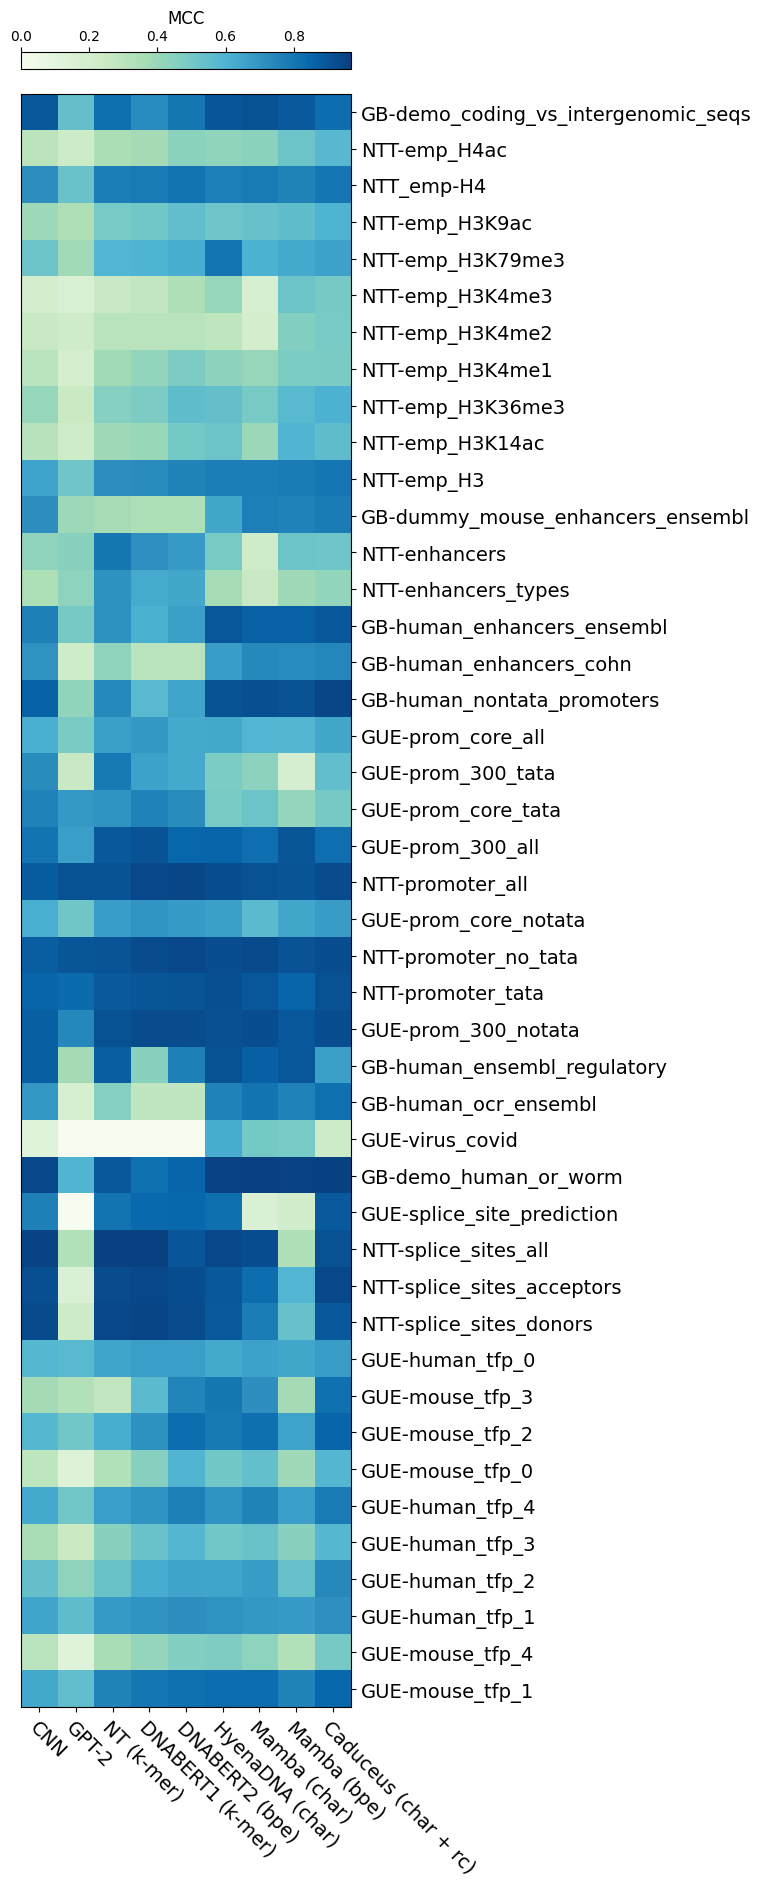

In [627]:
heatmap_mcc_vertical(df_numeric, 'Model Performance on All Benchmark Tasks', 'model_mcc_heatmap_all_vertical.pdf', 7, 27)

# Instability Trends - varying learning rate and batch size on genomic benchmark tasks


In [ ]:
df_instability = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/instability_heatmap_gb.csv',index_col=0)
df_instability

In [ ]:
df_instability_percent = df_instability.apply(lambda x: (x/10) * 100, axis=1)

In [ ]:
df_instability_percent

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_instability_percent, cmap="Blues")

# Customize the heatmap
plt.title('Percentage of Train/Loss = NaN on Genomic Benchmark, varying learning rate and batch size')
plt.xlabel('Learning Rate/Batch Size')
plt.ylabel('Datasets')

plt.xticks(rotation=45, ha='right')
plt.savefig('instability_heatmap_plot.pdf', format='pdf')

plt.show()

# Vocabulary Venn Diagrams


In [ ]:
dnabert2_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/dnabert2_words.txt', header=None, names=['DNABERT2'])
dnabert2_list = dnabert2_words['DNABERT2'].tolist()

In [ ]:
hg38_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/hg38_words.txt', header=None, names=['Hg38'])
hg38_list = hg38_words['Hg38'].tolist()

In [ ]:
mouse_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/mouse_words.txt', header=None, names=['Mouse'])
mouse_list = mouse_words['Mouse'].tolist()

In [ ]:
yeast_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/yeast_words.txt', header=None, names=['Yeast'])
yeast_list = yeast_words['Yeast'].tolist()

In [ ]:
bacteria_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/bacteria_words.txt', header=None, names=['Bacteria'])
bacteria_list = bacteria_words['Bacteria'].tolist()

In [ ]:
dnabert2 = set(dnabert2_list)
hg38 = set(hg38_list)
mouse = set(mouse_list)
yeast = set(yeast_list)
bacteria = set(bacteria_list)

# Create a Venn diagram
venn2([dnabert2, hg38], ('DNABERT2', 'Hg38'))

# Display the plot
plt.title("Common words between multi-species trained DNABERT2 BPE tokenizer and Hg38 BPE Tokenizer")
plt.show()

In [ ]:
# Create a Venn diagram
venn2([dnabert2, bacteria], ('DNABERT2', 'bacteria'))

# Display the plot
plt.title("Common words between multi-species trained DNABERT2 BPE tokenizer and Bacteria BPE Tokenizer")
plt.show()

In [ ]:
# Create a Venn diagram
venn2([hg38, bacteria], ('Hg38', 'bacteria'))

# Display the plot
plt.title("Common words between Hg38 BPE tokenizer and Bacteria BPE Tokenizer")
plt.show()

In [ ]:
# Create a Venn diagram
venn2([hg38, mouse], ('Hg38', 'Mouse'))

# Display the plot
plt.title("Common words between Hg38 BPE tokenizer and Mouse BPE Tokenizer")
plt.show()

In [ ]:
# Create a Venn diagram
venn2([dnabert2, mouse], ('DNABERT2', 'Mouse'))

# Display the plot
plt.title("Common words between multi-species trained DNABERT2 BPE tokenizer and Mouse BPE Tokenizer")
plt.show()

In [ ]:
# Create a Venn diagram
venn2([dnabert2, yeast], ('DNABERT2', 'Yeast'))

# Display the plot
plt.title("Common words between multi-species trained DNABERT2 BPE tokenizer and Yeast BPE Tokenizer")
plt.show()

In [ ]:
# Create a Venn diagram
venn2([hg38, yeast], ('Hg38', 'Yeast'))

# Display the plot
plt.title("Common words between Hg38 BPE tokenizer and Yeast BPE Tokenizer")
plt.show()

In [ ]:
# Create a Venn diagram
venn2([bacteria, yeast], ('bacteria', 'Yeast'))

# Display the plot
plt.title("Common words between bacteria BPE tokenizer and Yeast BPE Tokenizer")
plt.show()

In [ ]:
# Create a Venn diagram
venn2([bacteria, mouse], ('bacteria', 'Mouse'))

# Display the plot
plt.title("Common words between bacteria BPE tokenizer and Yeast BPE Tokenizer")
plt.show()

In [ ]:
# Create a Venn diagram
venn2([mouse, yeast], ('Mouse', 'Yeast'))

# Display the plot
plt.title("Common words between bacteria BPE tokenizer and Yeast BPE Tokenizer")
plt.show()

In [ ]:
# Create a Venn diagram
venn3([dnabert2, hg38, mouse], ('DNABERT2', 'Hg38', 'Mouse'))

# Display the plot
plt.title("Common words between multi-species trained DNABERT2, Hg38 and Mouse trained using a BPE tokenizer")
plt.show()

In [ ]:
venn3([dnabert2, hg38, mouse], ('DNABERT2', 'Hg38', 'Mouse'))

# Display the plot
plt.title("Common words between multi-species trained DNABERT2, Hg38 and Mouse trained using a BPE tokenizer")
plt.show()

In [ ]:
df_dnabert2 = pd.DataFrame(dnabert2, columns=['words'])
df_dnabert2['length'] = df_dnabert2['words']
df_dnabert2.to_csv('dnabert2_wordfreq.csv')

In [ ]:
df_mouse = pd.DataFrame(mouse, columns=['words'])
df_mouse['length'] = df_mouse['words']
df_mouse.to_csv('mouse_wordfreq.csv')

In [ ]:
df_hg38 = pd.DataFrame(hg38, columns=['words'])
df_hg38['length'] = df_hg38['words']
df_hg38.to_csv('hg38_wordfreq.csv')

In [ ]:
df_yeast = pd.DataFrame(yeast, columns=['words'])
df_yeast['length'] = df_yeast['words']
df_yeast.to_csv('yeast_wordfreq.csv')

In [ ]:
df_bacteria = pd.DataFrame(bacteria, columns=['words'])
df_bacteria['length'] = df_bacteria['words']
df_bacteria.to_csv('bacteria_wordfreq.csv')

# DNABERT2 Training Species Data

In [ ]:
headers = ['Class', 'Species', 'Total Nucleotides']
dnabert2_species = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/DNABERT_species.txt',names=headers )


In [ ]:
dnabert2_species

In [ ]:
dnabert2_species['Percentage'] = (dnabert2_species['Total Nucleotides'] / dnabert2_species['Total Nucleotides'].sum()) * 100
dnabert2_species

In [ ]:
summary = dnabert2_species.groupby('Class')['Total Nucleotides'].sum().reset_index()

In [ ]:
summary

In [ ]:
summary['Percentage'] = (summary['Total Nucleotides'] / summary['Total Nucleotides'].sum()) * 100
summary

In [ ]:
mask = ~dnabert2_species['Class'].str.contains('Mammalian')

# Separate into 'Mammalian' and other families
mammalian_df = dnabert2_species[~mask]
mammalian_df['Class'] = mammalian_df['Species']

other_df = dnabert2_species[mask]

# Summarize other families
summary_mammalian = other_df.groupby('Class')['Total Nucleotides'].sum().reset_index()

# Append 'Mammalian' families back to the summary
summary_mammalian = pd.concat([summary_mammalian, mammalian_df], ignore_index=True)
summary_mammalian.drop(columns=['Species'], inplace=True)
summary_mammalian.drop(columns=['Percentage'], inplace=True)

summary_mammalian['Percentage'] = (summary_mammalian['Total Nucleotides'] / summary_mammalian['Total Nucleotides'].sum()) * 100
sorted_summary = summary_mammalian.sort_values(by='Percentage', ascending=False)
print(sorted_summary)

In [ ]:
plt.figure(figsize=(10, 8))

plt.pie(sorted_summary['Total Nucleotides'],
        labels=sorted_summary['Class'],
        autopct='%1.1f%%',
        pctdistance=0.80,
        textprops={'fontsize':12},
        colors = ["#e15759", "#76b7b2", "#59a14f", "#edc949", "#af7aa1", "#ff9da7", "#9c755f", "#bab0ab", "#4e79a7","#f28e2c"],
        startangle=180,
        counterclock=False,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
        )


hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.title('Distribution of Nucleotides in DNABERT2 Training Dataset\n', fontsize=16)
plt.gcf().gca().add_artist(hole)
#plt.legend(sorted_summary['Class'], loc='center left', bbox_to_anchor=(0.87, 0.5))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('dnabert2_pie.eps', bbox_inches='tight')

# Show the plot
plt.show()

# BPE vs Char visualization

In [ ]:
bpevschar = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/bpevschar_all.csv')
bpevschar

In [ ]:
bpevschar['bpe-mcc'] = pd.to_numeric(bpevschar['bpe-mcc'], errors='coerce')
bpevschar['bpe-mcc'].fillna(0, inplace=True)
bpevschar

In [ ]:
bpevschar.info()

In [ ]:
bpevschar.columns.tolist()

In [ ]:
bpevschar_gue = bpevschar[bpevschar['Benchmark'] == 'GUE']
bpevschar_gb = bpevschar[bpevschar['Benchmark'] == 'Genomic Benchmark']
bpevschar_nt = bpevschar[bpevschar['Benchmark'] == 'Nucleotide Transformer Tasks']

In [ ]:
from matplotlib.lines import Line2D

In [ ]:
def plot_bpe_vs_char(ax, df, df_subset, bpe, char, xlabel, ylabel, title, range_min, range_max):
  print(range_min, range_max)
  hex_colors = ["#e15759", "#76b7b2", "#59a14f", "#edc949", "#af7aa1", "#ff9da7", "#9c755f", "#bab0ab", "#4e79a7","#f28e2c"]
  markers = [ 'o', 's', 'd', 'P','v', '<', '>', 'p', 'P', '*', 'o', 's', 'D', '^',]

  unique_layers = df['Layers'].unique()
  print(unique_layers)
  unique_category = df['Category'].unique()
  print(unique_category)
  marker_map = {category: markers[i % len(markers)] for i, category in enumerate(unique_category)} # different color for each
  color_map = {category: hex_colors[i % len(hex_colors)] for i, category in enumerate(unique_category)}

  #for layer_size in unique_layers:
  for category in unique_category:
    subset = df_subset[(df_subset['Layers'] == 4) & (df_subset['Category'] == category)]
    #subset = df_subset[(df_subset['Category'] == category)]
    ax.scatter(subset[bpe], subset[char], c=color_map[category], marker=marker_map[category], label=None, s=36)


  ax.set_xlim([range_min, range_max])
  ax.set_ylim([range_min, range_max])

  ax.set_xlabel(xlabel, fontsize=12)
  ax.set_ylabel(ylabel, fontsize=12)
  ax.set_title(title, fontsize=14)

  # Add a diagonal line
  ax.plot([range_min, range_max], [range_min, range_max], color='#d3d3d3', linestyle='--')

  ax.grid(True, which="both", ls="--")

  #for layer in unique_layers:
  #  ax.scatter([], [], marker=marker_map[layer], color='grey', label=f'{layer} Layers')  # Empty scatter plot to create color legend

  unique_sub_category = df_subset['Category'].unique()
  for category in unique_sub_category:
    ax.scatter([], [], color=color_map[category], marker=marker_map[category], label=f'{category}')  # Empty scatter plot to create shape legend

  legend = ax.legend(loc='lower right', fontsize=10)
  legend.get_frame().set_linewidth(0)
  #plt.savefig('bpevschar.pdf', format='pdf', bbox_inches='tight')
  return ax

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
from matplotlib.ticker import StrMethodFormatter



scatter1 = plot_bpe_vs_char(axes[0,0], bpevschar, bpevschar_nt, 'bpe-acc', 'char-acc', 'BPE Accuracy', 'Char Accuracy', 'Nucleotide Transformer Tasks', 0.5, 1)
scatter2 = plot_bpe_vs_char(axes[1,0], bpevschar, bpevschar_nt, 'bpe-mcc', 'char-mcc', 'BPE MCC', 'Char MCC', 'Nucleotide Transformer Tasks', 0, 1)
scatter3 = plot_bpe_vs_char(axes[0,1], bpevschar, bpevschar_gb, 'bpe-acc', 'char-acc', 'BPE Accuracy', 'Char Accuracy', 'Genomic Benchmark', 0.5, 1)
scatter4 = plot_bpe_vs_char(axes[1,1], bpevschar, bpevschar_gb, 'bpe-mcc', 'char-mcc', 'BPE MCC', 'Char MCC', 'Genomic Benchmark', 0, 1)
scatter5 = plot_bpe_vs_char(axes[0,2], bpevschar, bpevschar_gue, 'bpe-acc', 'char-acc', 'BPE Accuracy', 'Char Accuracy', 'GUE', 0.5, 1)
scatter6 = plot_bpe_vs_char(axes[1,2], bpevschar, bpevschar_gue, 'bpe-mcc', 'char-mcc', 'BPE MCC', 'Char MCC', 'GUE', 0, 1)

fig.subplots_adjust(hspace=0.35)
fig.savefig('bpevschar.pdf', format='pdf', bbox_inches='tight')
#fig.suptitle("Tokenization Comparison on Mamba using the NT Tasks\n", fontsize=16)

# Variance

In [ ]:
attention_models = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/anisa_results_tall.csv')

In [ ]:
attention_models.head()


In [ ]:
models = attention_models['model'].unique()
models

In [ ]:
metrics_list = []

for model in models:
  attention_model = attention_models[attention_models['model'] == model]
  tasks = attention_model['task'].unique()
  for task in tasks:
    attention_task = attention_model[attention_model['task'] == task]
    metrics_dict = {
      'Model': model,
      'Task': task,
      'Accuracy Mean': attention_task['accuracy'].mean(),
      'Accuracy Min': attention_task['accuracy'].min(),
      'Accuracy Max': attention_task['accuracy'].max(),
      'Accuracy Std': attention_task['accuracy'].std(),
      'MCC Mean': attention_task['mcc'].mean(),
      'MCC Min': attention_task['mcc'].min(),
      'MCC Max': attention_task['mcc'].max(),
      'MCC Std': attention_task['mcc'].std()
    }

    # Append the dictionary to the list
    metrics_list.append(metrics_dict)

metrics_df = pd.DataFrame(metrics_list)

# Display the dataframe
metrics_df

In [ ]:
for model in models:
  attention_model = attention_models[attention_models['model'] == model]
  model_metrics = metrics_df[metrics_df['Model'] == model]
  print("*****************************")
  print(model)
  print(model_metrics.describe())

In [ ]:
metrics_df.to_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/attention_metrics.csv', index=False)

In [ ]:
ss_models = pd.read_csv('test_metrics.txt') # state space model data

In [ ]:
ss_models

In [ ]:
models = ss_models['model'].unique()
models

In [ ]:
metrics_list=[]

In [ ]:
#ERROR IN THIS CHECK IT
for model in models:
  ss_models = ss_models[ss_models['model'] == model]
  tasks = ss_models['task'].unique()
  for task in tasks:
    ss_task = ss_model[ss_model['task'] == task]
    metrics_dict = {
      'Model': model,
      'Task': task,
      'Accuracy Mean': ss_task['value'].mean(),
      'Accuracy Min': ss_task['value'].min(),
      'Accuracy Max': ss_task['value'].max(),
      'Accuracy Std': ss_task['value'].std(),

    }
    metrics_list.append(metrics_dict)

metrics_df = pd.DataFrame(metrics_list)

# Display the dataframe
metrics_df